In [64]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\rubit\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [119]:
import pandas as pd

In [120]:
import numpy as np

In [121]:
import seaborn as sns

In [122]:
import matplotlib.pyplot as plt

# <span style="color: rgb(230, 0, 126);">NIVELL I</span>


**1.**

Connecta Python amb MySQL Workbench i carrega les dades de la teva base de dades del Sprint 4 per utilitzar-les en tots els exercicis.


Primero instalamos el módulo conector de MySQL

In [123]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\rubit\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Importamos la base de datos:

In [124]:
import mysql.connector

try:
    connection = mysql.connector.connect(user='root', 
                                        password='12345',
                                        host='localhost',
                                        database='tienda_s4')
    if connection.is_connected():
        db_tienda_s4 =  connection.server_info
        print("La conexión a MySQL ha sido exitosa")
        print("Versión del servidor:", db_tienda_s4)

        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("Te has conectado a la base de datos: ", record[0])

except Error:
    print("Error al conectar a MySQL:")

La conexión a MySQL ha sido exitosa
Versión del servidor: 8.0.42
Te has conectado a la base de datos:  tienda_s4


Una vez conectados nos familiarizamos con la base de datos y visualizamos qué tablas tenemos:

In [125]:
cursor.execute("SHOW TABLES")
tablas = cursor.fetchall()

tablas

[('companies',),
 ('credit_cards',),
 ('products',),
 ('status_cards',),
 ('transaction_products',),
 ('transactions',),
 ('users',)]

Cargamos las tablas en Pandas para transformarla en dataframe:

In [126]:
for tabla in tablas:
    nombre = tabla[0]
    query = f"SELECT * FROM {nombre}"
    globals()[f"df_{nombre}"] = pd.read_sql(query, connection)
    print(f"df_{nombre}")

C:\Users\rubit\AppData\Local\Temp\ipykernel_6844\1231419706.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  globals()[f"df_{nombre}"] = pd.read_sql(query, connection)


df_companies
df_credit_cards
df_products
df_status_cards
df_transaction_products
df_transactions
df_users


Como las variables id coinciden en nombre en las diversas tablas, las renombramos para no generar confusiones:

In [127]:
df_transactions = df_transactions.rename(columns={"id": "id_transactions"})
df_users = df_users.rename(columns={"id": "id_users"})
df_products = df_products.rename(columns={"id": "id_products"})

**2.**

Per a cada ítem, crea una visualització adequada segons les variables especificades. Interpreta els resultats segons les teves dades.

Recorda: quan seleccionis les columnes, pensa sempre en el mètode que faràs servir i inclou les que calguin per a la funció de visualització que vulguis utilitzar.

- **Una variable numèrica.**

Analizaremos qué patrón sigue el gasto que realizan los clientes por lo que creamos un Boxplot del amount (de la tabla transactions):

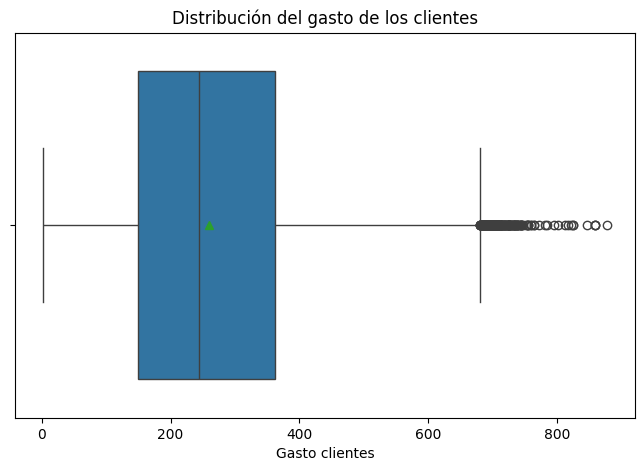

In [128]:
plt.figure(figsize=(8, 5))

sns.boxplot(x=df_transactions["amount"], showmeans=True)
plt.title("Distribución del gasto de los clientes")
plt.xlabel("Gasto clientes")

plt.show()


Observamos que la mayoría de clientes realiza un gasto que se sitúa cerca de los 200 euros. Además la media de gasto de los clientes se sitúa muy cercana a la mediana, esto nos lleva a pensar que la distribución de gastos de los clientes es bastante equilibrada y que gastan cantidades similares (muy pocos realizan gastos muy bajos o muy elevados).
Visualizando el tamaño de la caja confirmamos que el gasto de la mayoría de los clientes se concentra entre un valor muy próximo a los 200 euros y un valor muy próximo a los 400 euros.
Todo y esto, podemos observar algún valor atípico que se sitúa en un gasto de entre 700 y 900 euros, por lo que podemos considerar que disponemos de algún cliente VIP que gastan más de lo normal en la tienda.

- **Dues variables numèriques.**

Analizaremos si el precio de un producto influye en el número de ventas, así que creamos un gráfico de relación (relplot). 

Para ello, primero crearemos un dataframe que nos contará cuantas veces se ha vendido cada producto (así creamos una variable númerica).
Posteriormente, creamos un dataframe que unirá las veces que se ha vendido cada producto con la tabla de productos para poder acceder al precio de cada uno de ellos (segunda variable númerica).

Una vez hecha la unión, hacemos una limpieza de la tipología de dato del precio para quitarle el dólar.

Por último, realizamos el gráfico relplot.

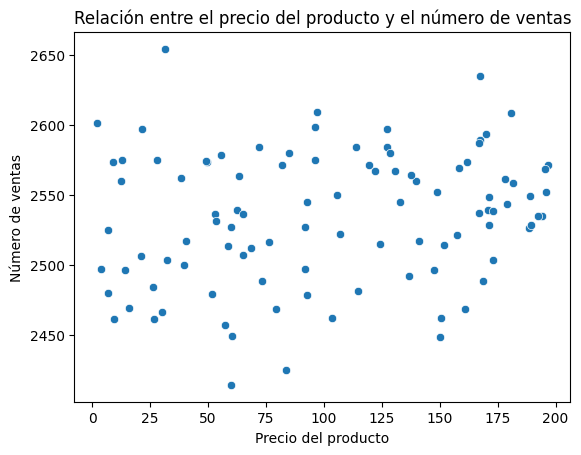

In [129]:
df_ventas_cada_producto = (df_transaction_products.groupby("product_id").size().reset_index(name="total_ventas_por_producto"))

df_ventas_y_precio = pd.merge(df_ventas_cada_producto, df_products, left_on="product_id", right_on="id_products", how="inner")

#Limpieza tipología del dato
df_ventas_y_precio["price"] = (
    df_ventas_y_precio["price"]
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float)
)

sns.scatterplot(data=df_ventas_y_precio, x="price", y="total_ventas_por_producto")
plt.title("Relación entre el precio del producto y el número de ventas")
plt.xlabel("Precio del producto")
plt.ylabel("Número de ventas")

plt.show()


Sorprendentemente, no hay una relación muy marcada de que el precio del producto pueda influir en las ventas. 
No hay una línea muy clara que indique que el precio del producto influya en el número de ventas ya que sin importar si el precio es bajo o alto el número de ventas se mantiene.
Todo y esto, sí que podemos observar algunos puntos muy aislados que se alejan tanto en valores bajos como en altos pero son tan mínimos que no influyen.


- **Una variable categòrica.**

Analizaremos cuántos usuarios tenemos en la base de datos por cada país. 
Para ello utilizaremos un gráfico countplot que nos mostrará el recuento de usuarios por cada país, ordenado de mayor a menor.

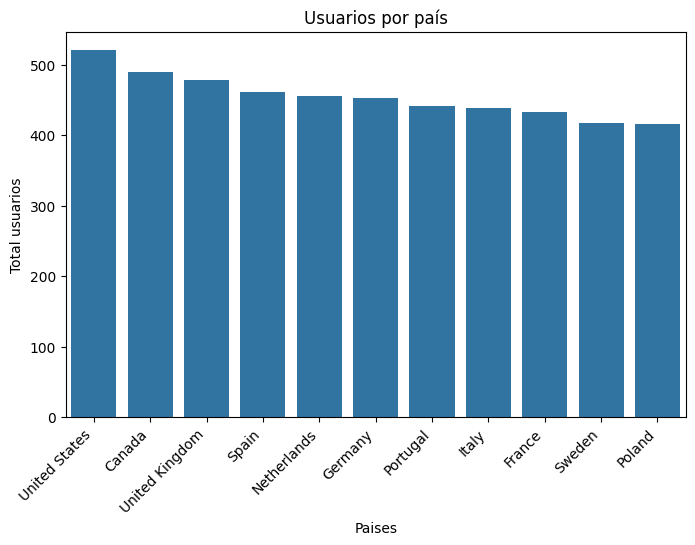

In [130]:
plt.figure(figsize=(8, 5))

orden_descendente = df_users['country'].value_counts().index

sns.countplot(data=df_users, x="country", order=orden_descendente)

plt.xticks(rotation=45, ha="right")
plt.title("Usuarios por país")
plt.xlabel("Paises")
plt.ylabel("Total usuarios")

plt.show()

Observamos como en la base de datos los usuarios que más registros tienen son los de Estados Unidos, seguidos de Canadá e Inglaterra. Los usuarios de Plonia y Secia son los que menos registros tienen.


- **Una variable categòrica i una numèrica.**

Analizaremos el volúmen total de ventas (variable númerica) de los últimos cuatro años (variable categórica).

Primero preparamos la variable timestamp de la tabla transactions para que realmente esté en formato datetime y así poder obtener en una nueva columna unicamente el año de forma individual.

Después creamos un dataframe con un filtrado para que unicamente se visualicen los datos de los últimos 4 años y obtenemos la agrupación de ventas por año para poder crear el lineplot.

En el visualizado del gráfico, vemos el eje y en notación cientifica (solucionamos con plt.gca) y los años con decimales (solucionamos con plt.xticks)

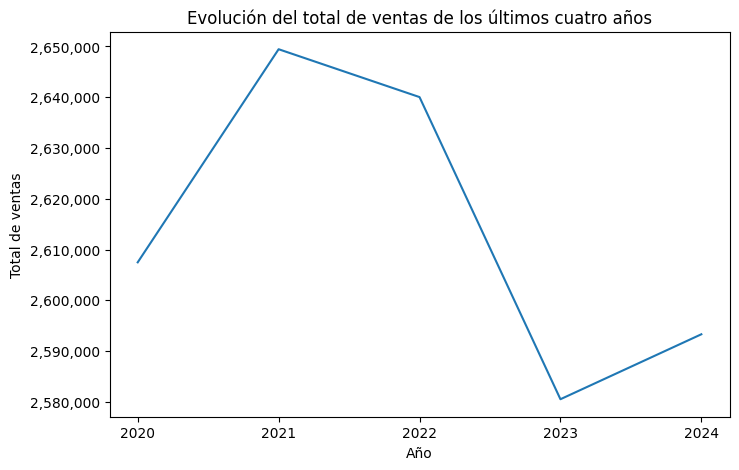

In [131]:
# Preparamos timestamp 
df_transactions["timestamp"] = pd.to_datetime(df_transactions["timestamp"])
df_transactions["year"] = df_transactions["timestamp"].dt.year

#Calculamos el total de ventas de los últimos 4 años
df_ultimos_4_anios = df_transactions[df_transactions["year"].between(2020, 2024)]

df_ventas_por_anio = (df_ultimos_4_anios.groupby("year", as_index=False)["amount"].sum())


plt.figure(figsize=(8, 5))

sns.lineplot(data=df_ventas_por_anio, x="year", y="amount")

#Forzar enteros 
plt.xticks(df_ventas_por_anio["year"]) 

#Quitar notación científica del eje
import matplotlib.ticker as mtick
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) 

plt.title("Evolución del total de ventas de los últimos cuatro años")
plt.xlabel("Año")
plt.ylabel("Total de ventas")


plt.show()


Observamos de forma muy clara como las ventas aumentan del 2020 al 2021, sin embargo, a partir de este año la tendencia es descenciente. En el año 2023 hay una caída elevada de ventas que empieza a recuperarse en el 2024.

- **Dues variables categòriques.**

Analizaremos cuantos usuarios hay en España y Portugal (primera variable categorica) por grupo de edad (segunda variable categorica).

Primero nos aseguramos de que la variable birth_date esté en formato datetime y en la tabla de Usuarios, utilizaremos la columna de fecha de nacimiento para crear una nueva columna con la edad actual del usuario. Después creamos los diferentes grupos de edad para analizar.

Una vez tenemos las columnas creadas, hacemos un dataframe filtrando los datos para los países España y Portugal.

Por último, creamos el countplot con las dos variables categóricas.

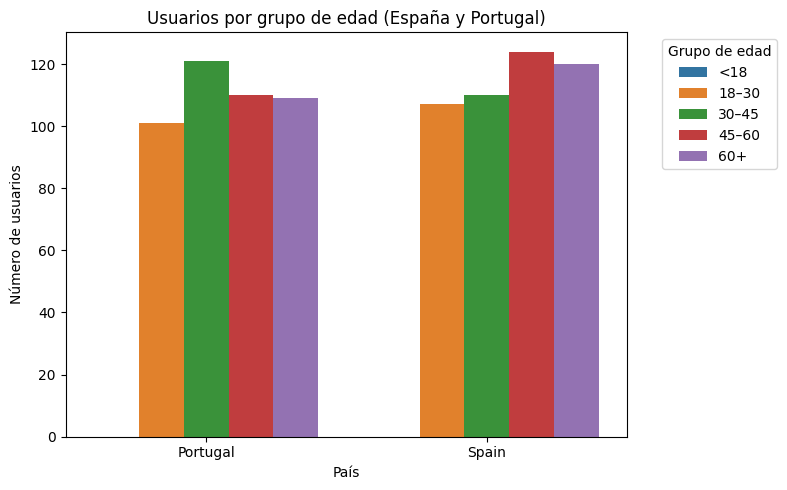

In [132]:
df_users["birth_date"] = pd.to_datetime(df_users["birth_date"])

df_users["user_age"] = (pd.to_datetime("today") - df_users["birth_date"]).dt.days // 365

df_users["grupo_edad"] = pd.cut(
    df_users["user_age"],
    bins=[0, 18, 30, 45, 60, 100],
    labels=["<18", "18–30", "30–45", "45–60", "60+"]
)

df_usuarios_filtrado = df_users[(df_users["country"] == "Spain") | (df_users["country"] == "Portugal") ]


plt.figure(figsize=(8, 5))
sns.countplot(data=df_usuarios_filtrado, x="country", hue="grupo_edad")

plt.title("Usuarios por grupo de edad (España y Portugal)")
plt.xlabel("País")
plt.ylabel("Número de usuarios")

plt.legend(
    title="Grupo de edad",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)


plt.tight_layout()
plt.show()

Cómo era de esperar, en la base de datos no tenemos menores de 18 años ya que legalmente no es posible que se registren en tiendas online.

En el gráfico observamos que el grupo de usuarios más numeroso en Portugal es el de 30-45 años, mientras que en España predominan los usuarios de edad más avanzada, destacando el grupo de 45-60 años. 

El grupo de 18-30 años se sitúa de forma similar en los dos países.


- **Tres variables combinades.**

Siguiendo con España y Portugal, analizaremos la evolución del total de ventas (primera variable) de cada país (segunda variable) a lo largo del tiempo (tercera variable).
Recuperamos el dataframe de usuarios filtrado por Portugal y España y lo juntamos con transacciones. Posteriormente, creamos un dataframe de ventas anuales para obtener un lineplot.


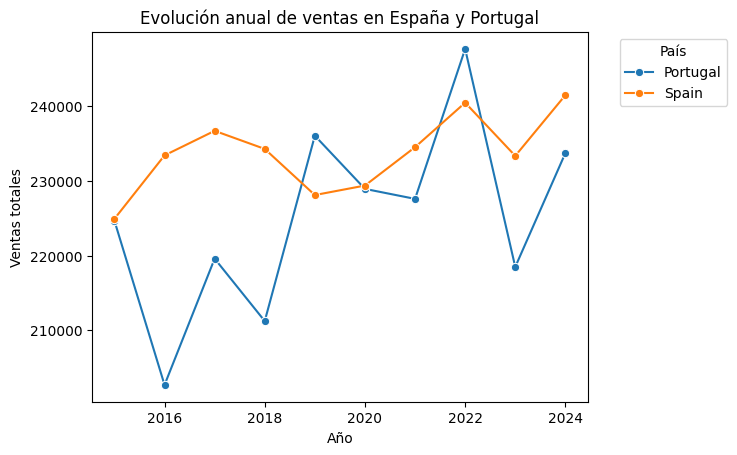

In [133]:
df_transactions_and_users_4years = pd.merge(df_transactions, df_usuarios_filtrado, left_on="user_id", right_on="id_users")


df_ventas_anuales = (
    df_transactions_and_users_4years.groupby(["year", "country"])["amount"]
    .sum()
    .reset_index()
)

sns.lineplot(data=df_ventas_anuales, x="year", y="amount", hue="country", marker="o")

plt.title("Evolución anual de ventas en España y Portugal")
plt.xlabel("Año")
plt.ylabel("Ventas totales")

plt.legend(
    title="País",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

plt.show()

Observamos que España tiene un crecimiento de ventas más constante y estable que Portugal.
España tiene pequeñas caídas de ventas en 2019 y 2023 y obtiene su punto más alto en el último año (2024). Por otro lado, vemos que Portugal tiene caídas de ventas importantes en 2016 y 2023 y un pico máximo histórico en 2022 (que superó a España.)
En 2020 España y Portugal igualaron sus niveles de ventas y posteriormente volvieron a separar sus trayectorias.

- Crea un Pairplot.

Realizaremos un análisis sobre la relación que pueda haber entre el gasto, la hora de compra, la edad del usuario y el total de productos que se han comprado.

Comentar que ya hemos creado con anterioridad una columna con la edad del usuario y esta es la que utilizaremos también para el siguiente analisis.

Además, como queremos visualizar la hora en la que se han realizado las compras, extraeremos la hora exacta de la variable timestamp de la tabla de transactions, creando una nueva columna de hora.

A continuación, obtendremos el número de productos por transacción, creando un nuevo dataframe que agrupará el total de productos que se compran en cada transacción.

Para poder juntar las tablas que necesitamos en un único dataframe y dado que hay variables con el mismo nombre, para trabajar mejor, renombramos los nombres duplicados.

Creamos el dataframe df_pairplot que será con el que trabajaremos finalmente el gráfico y creamos el gráfico Pairplot y asignamos que en las subtramas diagonales nos muestre gráfico de densidad.


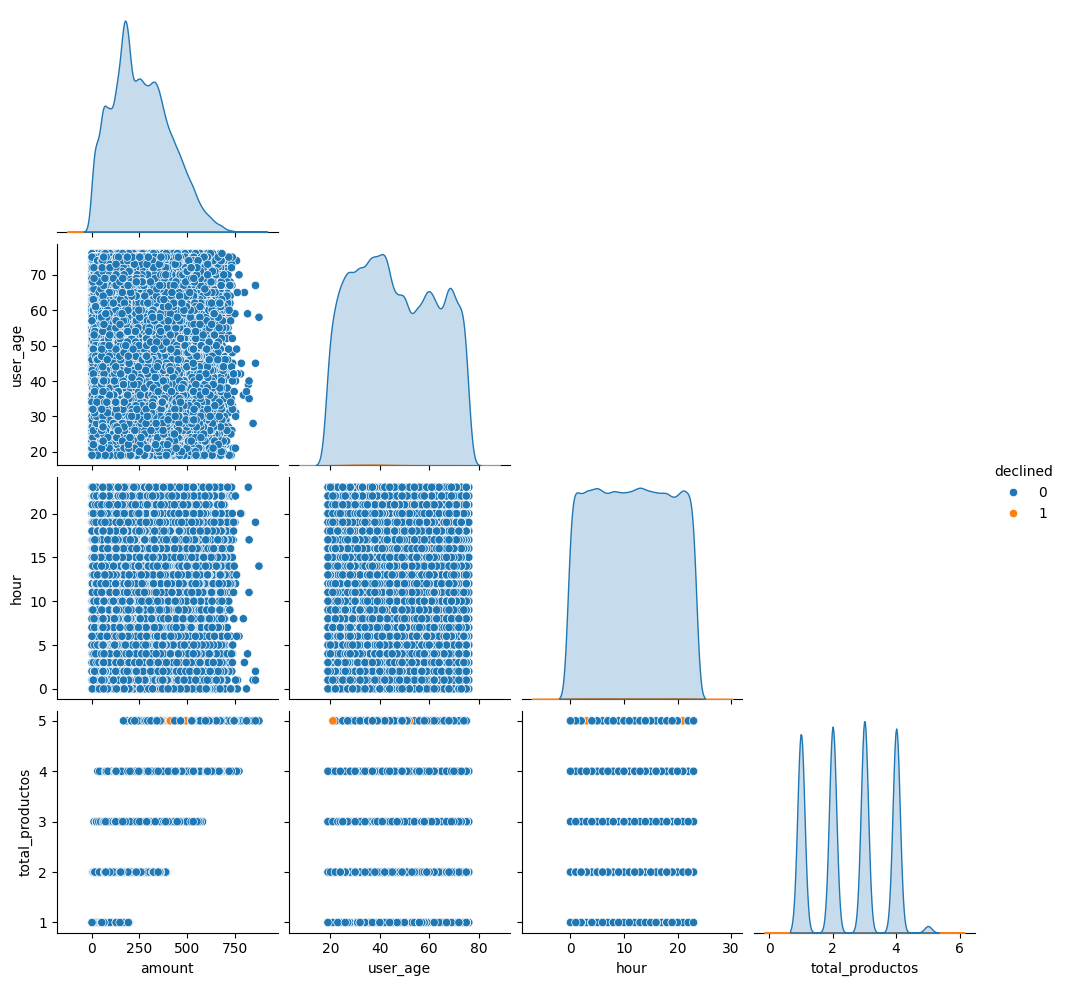

In [134]:
df_transactions["hour"] = df_transactions["timestamp"].dt.hour


df_productos_por_transaccion = (
    df_transaction_products
    .groupby("transaction_id")
    .agg(total_productos=("product_id", "count"))
    .reset_index()
)

df_pairplot = (
    df_transactions
    .merge(df_users[["id_users", "user_age"]], left_on="user_id", right_on="id_users", how="left")
    .merge(df_productos_por_transaccion,  left_on="id_transactions", right_on="transaction_id", how="left")
    .loc[:, ["amount", "user_age", "hour", "total_productos", "declined"]]
)


sns.pairplot(
    data=df_pairplot,
    vars=["amount", "user_age", "hour", "total_productos"],
    hue="declined",
    diag_kind="kde",
    corner=True
)

plt.show()

Cada punto del gráfico representa una transacción realizada y este nos muestra la relación entre el importe de la transacción, la edad del usuario, la hora del día en la que se realizó la transacción y el número de productos que se compraron por cada transacción. Además en naranja podemos ver las transacciones que fueron declinadas.

En el gráfico podemos observar como en el amount, la distribución gráfica tiende a la derecha por lo que la mayoría de las transacciones son de importe medio o bajo.

En cuanto a la edad y la hora de compra, vemos una distribución muy uniforme: no hay una hora concreta de compra, se reparte a lo largo del día, ni tampoco una edad fija.

Por lo que respecta al total de productos por transacción, las cestas suelen ser sobre todo con cantidades de 1 a 4 productos.

También podemos observar que hay una relación entre el total de productos con el coste total de la compra: cuánto más producto, mayor es el importe, como suele ser lógico. No hay una relación clara entre edad del usuario y el importe de las transacciones, parecen importes similares en todas las edades aunque observamos algún distanciamiento a partir de los 30 años. Tampoco hay una relación clara entre el gasto y la hora de compra ni tampoco observamos compras declinadas a una hora específica.

Vemos pocas compras declinadas y no observamos un patrón claro por lo que el rechazo de la transacción no depende ni de la hora ni de la edad ni de la cantidad de productos.

# <span style="color: rgb(230, 0, 126);">NIVELL II</span>


**1.**

Representa la correlació d'algunes variables i interpreta els resultats segons les teves dades.

Analizaremos la relación que hay entre el gasto total por cliente frente al número de trtansacciones que realiza cada uno.

Para ello, haremos un dataframe donde sumaremos el amount por cliente de la tabla transactions y contaremos el total de transacciones que ha realizado cada cliente.

Posteriormente, aplicaremos este dataframe en un scatterplot.



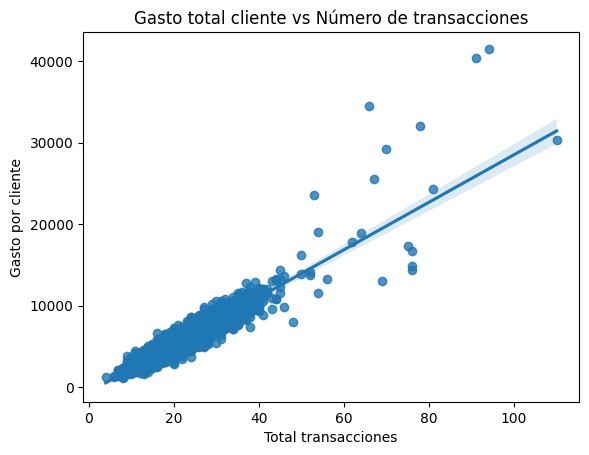

In [135]:
df_gasto_transacciones = (df_transactions
                          .groupby("user_id")
                          .agg(
                              gasto_cliente=("amount", "sum"), 
                              total_transacciones=("id_transactions","count")
                              )
                              .reset_index()
                              )

sns.regplot(
    data=df_gasto_transacciones, 
    x="total_transacciones", 
    y="gasto_cliente")

plt.title("Gasto total cliente vs Número de transacciones")
plt.xlabel("Total transacciones")
plt.ylabel("Gasto por cliente")

plt.show()

Estamos ante una correlación positiva clara entre el número total de transacciones y el gasto total por cliente: a medida que aumenta el número de transacciones del cliente, también tiende a aumentar el gasto total del cliente. Es una correlación lógica: cuántos más pedidos realiza un cliente, mayor es la inversión que realiza en la tienda, debemos conservar la fidelización de los clientes para aumentar los ingresos.

La línea nos indica que el gasto crece de forma lineal respecto al número de transacciones.

La sombra nos muestra que al principio es muy estrecha y que el comportamiento de los clientes es predecible pero a partir de las 60 transacciones la sombra se ensancha porque hay menos datos y el comportamiento es más variable.

Observamos algunos puntos aislados por encima de la linea en la parte central que indican que hay algún cliente que gasta más que otros, con el mismo número de transacciones, por lo que debe adquirir productos más caros o premium.

Podemos detectar también el cliente que más compras ha realizado (el punto que se sitúa más a la derecha): este cliente debe comprar productos económicos puesto que no se trata del cliente que más gasto ha realizado.

**2.**
Implementa un Jointplot per explorar la relació entre dues variables i interpreta els resultats segons les teves dades.

Realizaremos un análisis de la relación que pueda haber entre el importe total de las transacciones y la cantidad de productos comprados por cada transacción.

Para ello, obtendremos un dataframe que cuente la cantidad de productos que hay por transacción (primera variable) y la uniremos a la tabla transactions, donde tenemos la variable amount (segunda variable).

Para la visualización, utilizaremos el Joinplot.


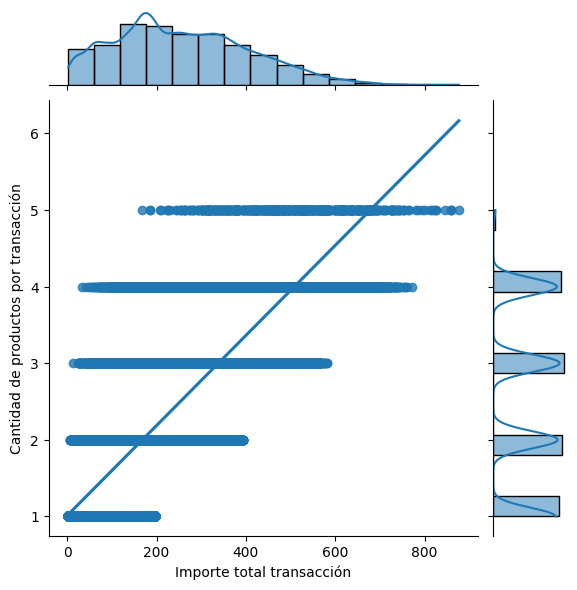

In [137]:
df_cantidad_productos_transaccion = (df_transaction_products.groupby("transaction_id").agg(productos_por_transaccion=("product_id", "count")).reset_index())

df_transactions_cantidadproductos = pd.merge (df_transactions, df_cantidad_productos_transaccion, left_on= "id_transactions", right_on= "transaction_id", how="inner")

sns.jointplot (data=df_transactions_cantidadproductos, x="amount", y="productos_por_transaccion", kind="reg", marginal_kws=dict(bins=15, fill=True))

plt.xlabel("Importe total transacción")
plt.ylabel("Cantidad de productos por transacción")

plt.show()

Como era de esperar, la regresión ascendiente nos indica que a mayor número de productos en el carrito, mayor es el importe total de la transacción.

El histograma superior nos muestra que la mayoría de las transacciones tienen un importe entre los 150 euros y los 400 euros, a partir de este punto, la línea baja notablemente.

El histograma lateral nos indica que la mayoría de transacciones suelen contener entre 1 y 4 productos.

Una vez trabajada la base de datos, se cierra la conexión:

In [138]:
if 'connection' in locals() and connection.is_connected():
    cursor.close()
    connection.close()
    print("MySQL connection is closed")

MySQL connection is closed


# <span style="color: rgb(230, 0, 126);">NIVELL III</span>


**1.**

Transfereix totes les visualitzacions del Nivell 1 a Power BI utilitzant scripts de Python.

Para que Power BI funcione con scripts de Python, es necesario descargar la versión de Python 3.11 (disponía de la 3.13) y forzar en Opciones el directorio raíz para la versión anterior del programa. Además, a través de cmd hay que hacer la instalación de Pandas, Matplotlib y Seaborn.


Una vez realizado esto, para que funcione correctamente la subida de la base de datos a través de un script de Python en Power BI, ponemos el siguiente código:

import pandas as pd
import mysql.connector

try:
    # Conexión a la base de datos
    connection = mysql.connector.connect(
        user='root', 
        password='12345',
        host='localhost',
        database='tienda_s4'
    )

    if connection.is_connected():
        cursor = connection.cursor()
        cursor.execute("SHOW TABLES")
        tablas = cursor.fetchall()

        for tabla in tablas:
            nombre_tabla = tabla[0]
            query = f"SELECT * FROM {nombre_tabla}"
            
            # Cargamos la tabla en un DataFrame
            df = pd.read_sql(query, connection)
            
            # --- SOLUCIÓN: Añadir columna identificadora ---
            # Esto crea una columna llamada 'ID_Registro_Unico' con números correlativos (0, 1, 2...)
            # que garantiza que cada fila sea única para Power BI.
            df = df.reset_index()
            df.rename(columns={'index': 'ID_Registro_Unico'}, inplace=True)
            
            # Guardamos el DataFrame en el entorno global para Power BI
            globals()[f"df_{nombre_tabla}"] = df

except Exception as e:
    print(f"Error al conectar o procesar: {e}")

finally:
    if 'connection' in locals() and connection.is_connected():
        cursor.close()
        connection.close()

Una vez detectada la base de datos, seleccionamos todas las tablas para hacer la subida de estas. Accederemos a la vista modelo para comprobar que las relaciones de las tablas sean las correctas. Hacemos las modificaciones necesarias para establecer las relaciones correctas y después creamos cada gráfico ejecutando el código para cada uno de ellos.

En el gráfico de relación entre el precio del producto y el número de ventas, recuerda que en los datos de Power BI ocurría algo con un producto en concreto, que hacía que este se distanciara mucho y no se mostrara el eje del gráfico como en Python. Para poder resolverlo, hicimos un filtrado de la cantidad de productos mayor que 1000.
